# 使用Scipy进行仿射变换
在本节中，我们将演示如何使用[scipy](https://scipy.org)应用仿射变换。


In [1]:
import numpy as np
from skimage.io import imread, imshow
from scipy import ndimage as ndi

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

(192, 256, 256)

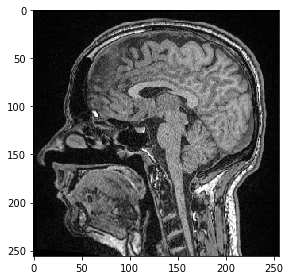

In [3]:
imshow(image[100])
image.shape

[仿射变换](https://en.wikipedia.org/wiki/Affine_transformation#Image_transformation)通常使用变换矩阵定义。

例如，我们可以在这样的矩阵中输入缩放因子，如下所示。通常，这些矩阵中处理的是逆变换。在缩放的情况下，如果我们想将图像尺寸增加2倍，我们需要输入`0.5`的缩放因子。原因是仿射变换矩阵定义了从目标图像中的每个像素到源图像中每个像素需要应用的变换。如果目标图像是源图像的两倍大，我们需要将目标像素坐标乘以`0.5`来确定相应的源像素坐标。

In [4]:
# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])

在应用变换之前，我们还需要计算输出图像的大小（形状）并创建该输出图像：

In [5]:
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
scaled = np.ndarray(output_shape)
scaled.shape

(384, 512, 512)

In [6]:
result = ndi.affine_transform(image, matrix, output=scaled, output_shape=output_shape)

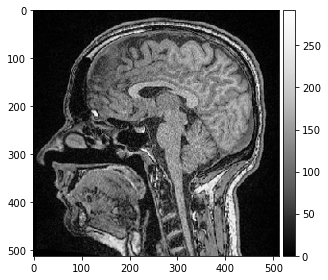

In [7]:
imshow(scaled[200], cmap="Greys_r", vmin=0)